In [1]:
# skipping warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')


In [3]:
#We will see the military spending data of G20 Countries
#we took the data from this site "https://www.sipri.org/databases/milex"
#Among csv,excel and other file formates i took excel which is flexible for me,
#based on your convenience you can use better one.

data = pd.read_csv("Privacy_Rights_Clearinghouse-Data-Breaches-Export.csv")
data.head()

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
0,"October 21, 2009",Bullitt County Public Schools,Shepherdsville,Kentucky,DISC,EDU,676,A Bullitt County Public Schools \n ...,Dataloss DB,NaN,2009,37.988399,-85.715792
1,"October 21, 2009",Roane State Community College,Harriman,Tennessee,PORT,EDU,"14,783",Roane State Community College \n ha...,Dataloss DB,NaN,2009,35.933964,-84.552436
2,"October 15, 2009",Halifax Health,Daytona Beach,Florida,PORT,MED,"33,000",A laptop computer from a Halifax \n ...,Dataloss DB,NaN,2009,29.210815,-81.022833
3,"October 4, 2009",Suffolk Community College,Selden,New York,DISC,EDU,300,Suffolk Community College has \n ag...,Dataloss DB,NaN,2009,40.866487,-73.035663
4,"September 28, 2009",Penrose Hospital,Colorado Springs,Colorado,PHYS,MED,175,Officials at Penrose Hospital bel...,Dataloss DB,NaN,2009,38.833882,-104.821363


In [4]:
data= data.dropna(axis = 0, how ='any') 
data.head()

,Date Made Public,Company,City,State,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
2819,"March 25, 2014",University of Kentucky HealthCare/Talyst,Lexington,Kentucky,PORT,MED,"1,079","UK Healthcare is notifying 1,079 patients that...",Government Agency,https://ocrportal.hhs.gov/ocr/breach/breach_re...,2014,38.040584,-84.503716
3068,"November 4, 2014",Hilton/Hilton Honors Program,McClean,Virginia,HACK,BSO,0,"""Hilton HHonors is at the center of a security...",Media,http://www.flyertalk.com/articles/hilton-hhono...,2014,38.933868,-77.177260
3092,"January 1, 2015",Summit Financial Group,La Mesa,California,DISC,BSF,662,"After a Summit client files a tax return, we m...",California Attorney General,https://oag.ca.gov/system/files/Sample%20Notic...,2015,32.767829,-117.023084
3099,"July 2, 2015",Harvard University,Boston,Massachusetts,HACK,EDU,0,"""Last month Harvard University uncovered ""an i...",Media,http://fortune.com/2015/07/02/harvard-data-bre...,2015,42.360083,-71.058880
3101,"May 5, 2016","ADP, LLC.",Roseland,New Jersey,HACK,BSF,0,"""Identity thieves have their hands on a new ba...",Media,http://www.bankrate.com/financing/taxes/adp-w-...,2016,40.820656,-74.293759


In [5]:
#Checking  for  count of NA's
data.isna().sum()

Date Made Public           0
Company                    0
City                       0
State                      0
Type of breach             0
Type of organization       0
Total Records              0
Description of incident    0
Information Source         0
Source URL                 0
Year of Breach             0
Latitude                   0
Longitude                  0
dtype: int64

In [6]:
data.describe()

,Year of Breach,Latitude,Longitude
count,363.000000,363.000000,363.000000
mean,2016.137741,36.892111,-91.429374
std,1.467053,8.042697,28.030586
min,2010.000000,0.000000,-158.009167
25%,2014.000000,34.052234,-117.282680
50%,2017.000000,38.713107,-88.029776
75%,2017.000000,40.721513,-77.000258
max,2018.000000,61.218056,114.057865


In [7]:
data.shape

(363, 13)

In [8]:
# To check the which year has many number of breachs

Text(0.5, 1.0, 'Distribution of breachs by year')

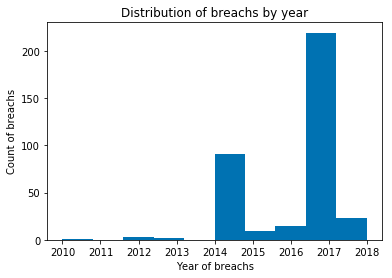

In [9]:
plt.hist(data["Year of Breach"]);
plt.ylabel("Count of breachs")
plt.xlabel("Year of breachs")
plt.title("Distribution of breachs by year")

In [10]:
#To see the Highest breach based on the data from years (2009-2018)

Text(0, 0.5, 'Count')

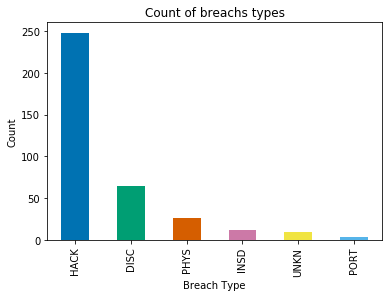

In [11]:
data['Type of breach'].value_counts().plot(kind='bar')
plt.title("Count of breachs types")
plt.xlabel("Breach Type")
plt.ylabel("Count")

In [12]:
#Looking at the type of breach based on company

In [13]:
breaches_by_group = data.groupby("Company")["Type of breach"].sum().sort_values(ascending=False)
breaches_by_group

Company
Monticello Central School District                                                          UNKN
Northeast Arc                                                                               UNKN
Purdue university                                                                           UNKN
Trinity college of nursing and health sciences                                              UNKN
Mid-Atlantic Carpenters' Training Center                                                    UNKN
Tio Networks                                                                                UNKN
Employer Leasing Company                                                                    UNKN
Westminster Ingleside King Farm Presbyterian Retirement Communities, Inc.(Rockville, MD)    UNKN
Central christian college of kansas                                                         UNKN
Ocean Acquisitions, Inc.                                                                    PORT
Penn Medicine         

In [14]:
#To check correlation between continuous variables

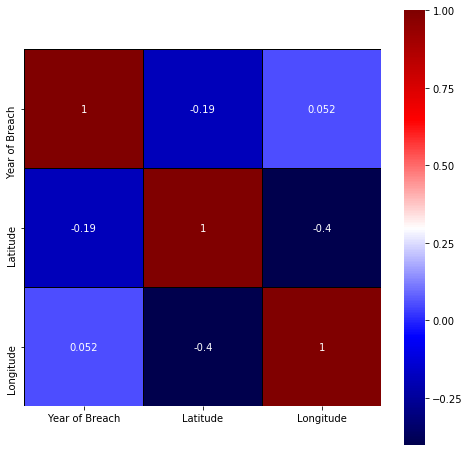

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),
            linewidths=0.25,
            square=True,
            cmap='seismic',
            linecolor='black',
            annot=True);

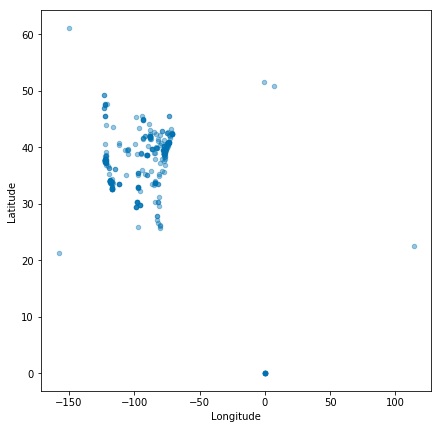

In [16]:
data.plot(kind="scatter",x='Longitude',y='Latitude',figsize=(7,7),alpha=0.4);

In [17]:
#Total number of breachs happening in relation with year

Text(0.5, 1.0, 'Number of breachs based on year')

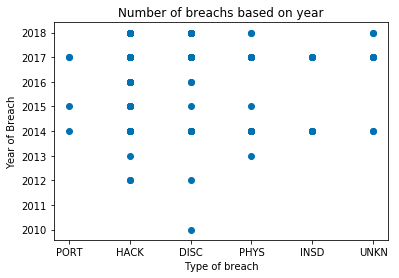

In [18]:
plt.scatter(data['Type of breach'],data['Year of Breach'])
plt.xlabel('Type of breach')
plt.ylabel('Year of Breach')
plt.title('Number of breachs based on year')

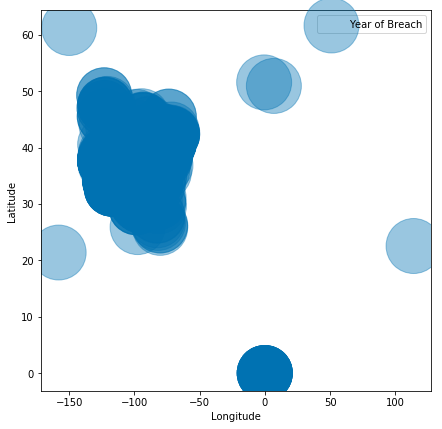

In [19]:
data.plot(kind="scatter",x='Longitude',y='Latitude',figsize=(7,7),alpha=0.4,s=data['Year of Breach']*1.5,
           label='Year of Breach');

In [20]:
data['State'].unique()

array(['Kentucky', 'Virginia', 'California', 'Massachusetts',
       'New Jersey', 'British Columbia', 'Georgia', 'New York',
       'Colorado', 'Connecticut', 'Quebec', 'Buckinghamshire', 'Berlin',
       'Minnesota', 'Texas', 'Kansas', 'Missouri', 'Pennsylvania', 'Ohio',
       'Illinois', 'Idaho', 'Hawaii', 'Maryland', 'Oregon', 'Tennessee',
       'South Dakota', 'Florida', 'Iowa', 'Arizona', 'North Carolina',
       'Nebraska', 'Oklahoma', 'Michigan', 'Indiana',
       'District Of Columbia', 'Delaware', 'New Hampshire', 'Alabama',
       'Nevada', 'Washington', 'South Carolina', 'Alaska', 'Utah',
       'New Mexico', 'Arkansas', 'North Dakota', 'Wisconsin', 'Maine',
       'Mississippi', 'Guangdong'], dtype=object)

In [21]:
newdataset = pd.read_csv("first.csv",index_col='State') 
newdataset.head()
  

,Date Made Public,Company,City,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
State,,,,,,,,,,,,
Kentucky,"October 21, 2009",Bullitt County Public Schools,Shepherdsville,DISC,EDU,676,A Bullitt County Public Schools \n ...,Dataloss DB,NaN,2009,37.988399,-85.715792
Tennessee,"October 21, 2009",Roane State Community College,Harriman,PORT,EDU,"14,783",Roane State Community College \n ha...,Dataloss DB,NaN,2009,35.933964,-84.552436
Florida,"October 15, 2009",Halifax Health,Daytona Beach,PORT,MED,"33,000",A laptop computer from a Halifax \n ...,Dataloss DB,NaN,2009,29.210815,-81.022833
New York,"October 4, 2009",Suffolk Community College,Selden,DISC,EDU,300,Suffolk Community College has \n ag...,Dataloss DB,NaN,2009,40.866487,-73.035663
Colorado,"September 28, 2009",Penrose Hospital,Colorado Springs,PHYS,MED,175,Officials at Penrose Hospital bel...,Dataloss DB,NaN,2009,38.833882,-104.821363


In [22]:
newdataset.rename(index = {"Kentucky": "US-KY","Virginia":"US-VA","California":"US-CA",
                            "Massachusetts":"US-MA","New Jersey":"US-NJ","British Columbia":"CA-BC",
                             "Georgia":"US-GA","New York":"US-NY","Colorado":"US-CO","Connecticut":"US-CT",
                              "Quebec":"CA-QC","Buckinghamshire":"GB-BKM","Berlin":"DE-BE",
                               "Minnesota":"US-MN","Texas":"US-TX","Kansas":"US-KS","Missouri":"US-MO",
                                "Pennsylvania":"US-PA","Ohio":"US-OH","Illinois":"US-IL","Idaho":"US-ID",
                                 "Hawaii":"US-HI","Maryland":"US-MD","Oregon":"US-OR","Tennessee":"US-TN",
                                  "South Dakota":"US-SD","Florida":"US-FL","Iowa":"US-IA","Arizona":"US-AZ",
                                   "North Carolina":"US-NC","Nebraska":"US-NE","Oklahoma":"US-OK",
                                    "Michigan":"US-MI","Indiana":"US-IN","District Of Columbia":"US-DC",
                                     "Delaware":"US-DE","New Hampshire":"US-NH","Alabama":"US-AL",
                                      "Nevada":"US-NV","Washington":"US-WA","South Carolina":"US-SC",
                                       "Alaska":"US-AK","Utah":"US-UT","New Mexico":"US-NM","Arkansas":"US-AR",
                                         "North Dakota":"US-ND","Wisconsin":"US-WI","Maine":"US-ME",
                                          "Mississippi":"US-MS","Guangdong":"CN-GD"},inplace = True)











In [23]:
newdataset.head()

,Date Made Public,Company,City,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL,Year of Breach,Latitude,Longitude
State,,,,,,,,,,,,
US-KY,"October 21, 2009",Bullitt County Public Schools,Shepherdsville,DISC,EDU,676,A Bullitt County Public Schools \n ...,Dataloss DB,NaN,2009,37.988399,-85.715792
US-TN,"October 21, 2009",Roane State Community College,Harriman,PORT,EDU,"14,783",Roane State Community College \n ha...,Dataloss DB,NaN,2009,35.933964,-84.552436
US-FL,"October 15, 2009",Halifax Health,Daytona Beach,PORT,MED,"33,000",A laptop computer from a Halifax \n ...,Dataloss DB,NaN,2009,29.210815,-81.022833
US-NY,"October 4, 2009",Suffolk Community College,Selden,DISC,EDU,300,Suffolk Community College has \n ag...,Dataloss DB,NaN,2009,40.866487,-73.035663
US-CO,"September 28, 2009",Penrose Hospital,Colorado Springs,PHYS,MED,175,Officials at Penrose Hospital bel...,Dataloss DB,NaN,2009,38.833882,-104.821363


In [24]:
newdataset.to_csv("file_states.csv")

In [25]:
newdataset = newdataset.groupby("State")["Total Records"].sum().sort_values(ascending=False)
display(newdataset)


State
US-SC            84,00001,824305,60031,0002,600400,000357151,28...
US-AR            807,000009,0002,48403,1161,10035,0007,0001,500...
CA-QC                                                    800,00040
US-KY            6765,0451002005,41824,60007092,0892,027772,631...
US-ND              65010,000290,78065010,0002,0006002,45206001,813
US-UT            6,000001,3000176,3003,20001,3003,8001,2902,480...
US-ME            5978004,58500011779180005,100094103,0001,92050...
US-ID                 59,0000300004410002,56205,5006,900025784,824
US-MO            56575,00025024081,9071,4000750201,700006,03012...
US-WI            500006006,400003060,0003,2881,60050079,0003,00...
US-WA            5,000130,000400,00002100013509,49301,0171,0000...
US-MI            45565005,00015000003,7000502,9796562,777032110...
US-KS            45145001,20000010,00001,0007,1000390029,000001...
Puerto Rico      406,0001,00022,56829,1431,6912,0005,0006051,90...
CN-GD                                                   

In [26]:
newdataset.to_clipboard()